### Motivation:

Power grids are systems where the demand-supply chain has to be maintained always between the generation of power, and the demand for power from the users to operate power grids without interruptions. Although protective measures are in place, power grids are prone to cascading failures.  Cascading failures in the power grids are scenarios where a small disturbance in the power grid can create a domino effect due to an imbalance sudden between demand-supply. The number of people getting affected by these events and the economic loss is astronomical. For example, the cascading failures in 2003 in the North-East affected more than 55 million people and the economic impact was in the billions.  From 1965 to 2008, there were nine massive blackout events affecting more than 20 million people whereas in the last decade there were seven massive blackouts including the largest one in India [[1]](https://en.wikipedia.org/wiki/List_of_major_power_outages).  In this project I will use a dataset that i have developed [[2]](https://www.researchgate.net/profile/Rezoan_Shuvro/publication/334971986_Predicting_Cascading_Failures_in_Power_Grids_using_Machine_Learning_Algorithms/links/5d4854ce299bf1995b681923/Predicting-Cascading-Failures-in-Power-Grids-using-Machine-Learning-Algorithms.pdf) earlier  to model cascading failures in power grid.




### Summary of the project obsjective:
This project is a domain-specific research project and will answer the following  problems:

- First, perform exploratory data analysis to find the patterns in data, for example observing the role of various features like load-shedding, human error, etc. on cascading failure. 
- Using regression techniques to find the effect of cascading failures due to various initiating disturbance conditions when cascading ends.
- Use classification techniques to identify the critical (leads to cascading failure) and non-critical (does not lead to cascading failure) initiating feature values.
- Do a comparison between various machine learning algorithms, do hyperparameter tuning where necessary.

### Dataset:  
I have developed the  cascading failures simulated dataset using my Cascading failure simulation (CFS) framework developed in Matlab.   It has more than 60000 simulations of cascading failures. The dataset contains 17 features and 2 target variables (total failed lines, Loadshed). 

[link of the dataset](https://drive.google.com/file/d/1qah8AXuABM8PwAYNwgm6zUqxX70JOp3L/view?usp=sharing)

-  Importing the libraries and loading the .csv file in a dataframe

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [138]:
# loading the dataset
dataset = pd.read_csv('CFS_dataset.csv')

- head of the data set

In [139]:
dataset.head(5)

,initially failed lines,failed lines after cascade,Cmax,Cmin,loadshedding constraint,loading ratio,capacity estimation error,flow capacity,Island?,degree,distance,installed cap,Load shedd,Load shedd.1,demand,served,HEP,generated,Alpha,failed lines due to cascade
0,6,86,200,50,0.45,0.90,0.50,768,0,2.675,7.397,1550,6307,6307,8970.0,2663.0,0.50,2663.0,0.2,80
1,4,52,200,100,0.05,0.85,0.20,209,0,2.699,6.912,450,2934,2934,8471.0,5537.0,0.50,5538.0,0.2,48
2,7,17,200,100,0.40,0.75,0.01,537,0,2.663,6.951,1050,700,700,7475.0,6775.0,0.50,6774.0,0.2,10
3,9,9,200,50,0.30,0.90,0.05,526,0,2.638,7.048,850,1507,1507,8970.0,7463.0,0.29,7462.0,0.2,0
4,3,82,200,50,0.05,0.85,0.35,149,0,2.712,6.855,300,3534,3534,8471.0,4937.0,0.72,4937.0,0.2,79


-  Tail of the dataset to check the size is okay

In [140]:
dataset.tail(2)

,initially failed lines,failed lines after cascade,Cmax,Cmin,loadshedding constraint,loading ratio,capacity estimation error,flow capacity,Island?,degree,distance,installed cap,Load shedd,Load shedd.1,demand,served,HEP,generated,Alpha,failed lines due to cascade
66815,10,56,100,50,0.70,0.7,0.15,481,0,2.625767,6.960539,900,2380,2380,6976.34,4596.34,0.091743,4595.900659,0.10,46
66816,5,47,200,100,0.55,0.6,0.20,499,0,2.687117,6.827160,800,1574,1574,5979.72,4405.72,0.168067,4405.717426,0.01,42


- Load shed is available twice in the dataset. So, i will drop that column.

In [141]:
#columns of the dataset
dataset.columns

Index(['initially failed lines', 'failed lines after cascade', 'Cmax', 'Cmin',
       'loadshedding constraint', 'loading ratio', 'capacity estimation error',
       'flow capacity', 'Island?', 'degree', 'distance', 'installed cap',
       'Load shedd', 'Load shedd.1', 'demand', 'served', 'HEP', 'generated',
       'Alpha', 'failed lines due to cascade'],
      dtype='object')

- The dataset column names are not consistent. So, i need to rename them to avoid inconsistensy

In [142]:
dataset.rename(columns={'initially failed lines': ' Intial failed lines', 
                       'failed lines after cascade':'Failed lines after cascade ends',
                        'loadshedding constraint': 'Load-shedding constraint',
                        'loading ratio': 'load-generation ratio',
                        'capacity estimation error':'Capacity estimation error',
                        'flow capacity':'Flow capacity','degree':'Degree', 'distance':'Distance',
                        'installed cap':'Installed capacity',
        'demand':'Demand', 'served':'Served', 'HEP':'Human error Probability', 'generated':'Generation',
        'failed lines due to cascade':'Failed lines due to cascade'
                       },inplace=True)

In [143]:
# shape of the dataset
dataset.shape

(66817, 20)

In [144]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66817 entries, 0 to 66816
Data columns (total 20 columns):
 Intial failed lines               66817 non-null int64
Failed lines after cascade ends    66817 non-null int64
Cmax                               66817 non-null int64
Cmin                               66817 non-null int64
Load-shedding constraint           66817 non-null float64
load-generation ratio              66817 non-null float64
Capacity estimation error          66817 non-null float64
Flow capacity                      66817 non-null int64
Island?                            66817 non-null int64
Degree                             66817 non-null float64
Distance                           66817 non-null float64
Installed capacity                 66817 non-null int64
Load shedd                         66817 non-null int64
Load shedd.1                       66817 non-null int64
Demand                             66817 non-null float64
Served                             6681

Since the data-set was generated from simulation, there should be no missing values in the dataset. We can confirm from above that there are no missing values in the dataset.

### Data cleaing and wranling 

- Load shedd and Load shedd.1 are same so remove Load shedd.1 

In [145]:
dataset.drop('Load shedd.1',axis=1,inplace=True)

In [146]:
# renaming Load shedd
dataset.rename(columns={'Load shedd':'Loadshed'},inplace=True)
dataset.head(2)

,Intial failed lines,Failed lines after cascade ends,Cmax,Cmin,Load-shedding constraint,load-generation ratio,Capacity estimation error,Flow capacity,Island?,Degree,Distance,Installed capacity,Loadshed,Demand,Served,Human error Probability,Generation,Alpha,Failed lines due to cascade
0,6,86,200,50,0.45,0.90,0.5,768,0,2.675,7.397,1550,6307,8970.0,2663.0,0.5,2663.0,0.2,80
1,4,52,200,100,0.05,0.85,0.2,209,0,2.699,6.912,450,2934,8471.0,5537.0,0.5,5538.0,0.2,48


Now, i will check the summary statistic and the correlation between variables to check if there is any inconsistency

In [147]:
dataset_describe = dataset.describe().transpose()

In [148]:
dataset_describe = dataset_describe.drop('count',axis =1)

In [149]:
# round the statistics to 2 decimal points
round (dataset_describe,2)

,mean,std,min,25%,50%,75%,max
Intial failed lines,6.00,2.58,2.00,4.00,6.00,8.00,10.00
Failed lines after cascade ends,42.84,22.54,2.00,27.00,49.00,58.00,104.00
Cmax,197.47,171.80,50.00,100.00,200.00,200.00,800.00
Cmin,65.22,34.97,50.00,50.00,50.00,50.00,800.00
Load-shedding constraint,0.32,0.24,0.01,0.15,0.30,0.50,0.90
load-generation ratio,0.73,0.15,0.50,0.60,0.75,0.85,0.99
Capacity estimation error,0.22,0.15,0.01,0.10,0.20,0.35,0.50
Flow capacity,428.19,257.28,0.00,224.00,391.00,587.00,1895.00
Island?,0.01,0.08,0.00,0.00,0.00,0.00,1.00
Degree,2.67,0.03,2.63,2.65,2.67,2.70,2.74


Now, we need to check whether all the columns of the dataset are relevant. To do that we can check the correlation and heatmap of colleration using seaborn vizialization.


In [150]:
correlation = round(dataset.corr(),2)


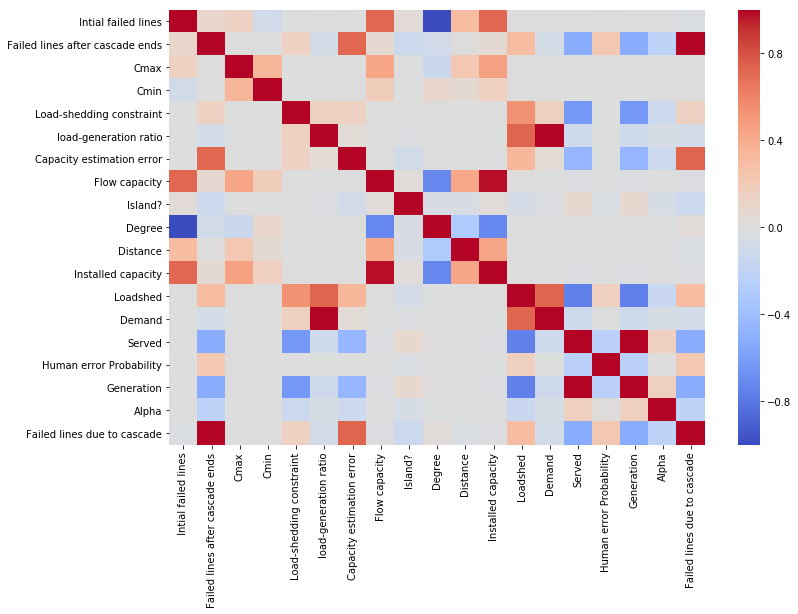

In [151]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(),cmap ='coolwarm',)
plt.savefig('heatmap.png', format='png',bbox_inches='tight')

In the dataset, we can do the following column removals:

- loadshed is calculated as the difference between demand and served loads. We need to remove demand and served columns to avoid colinearity. 
- Island colums can be removed as the value_counts are mostly zero and has no correlation with the failed lines due to cascade.  
- We want to predict failed lines due to cascade. So, we should remove failed lines after cascade ends to avoid colinearity.
- Flow capacity through the lines needs to be removed as we want to predict the cascade from installed capacities.


In [152]:
dataset['Island?'].value_counts()

0    66388
1      429
Name: Island?, dtype: int64

In [153]:
dataset.drop(['Island?','Served','Demand','Failed lines after cascade ends','Flow capacity'],axis=1,inplace=True)

- Here, our traget objective is to predict cascading failures. In the dataset, the output variables are Loadshed and Failed lines due to cascade. We define a normalized cascading effect variable as a linear combination of Loadshed and Failed lines due to cascade   

In [154]:
scaler = MinMaxScaler()
Scaled_data = scaler.fit_transform(dataset[['Loadshed','Failed lines due to cascade']])

C:\Users\Rezoan Ahmed\Anaconda5\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


- After normalizing the data, we use linear combination of  Loadshed and Failed lines due to cascade to calculate the casding effect and then insert that into the dataframe.

In [155]:
scaled_df = pd.DataFrame(Scaled_data)
scaled_df['Cascading effect'] = 0.5*scaled_df[0]+0.5*scaled_df[1]
dataset =pd.concat((dataset,scaled_df['Cascading effect']),axis =1)

In [156]:
#Check the head of the dataset again
dataset.head()

,Intial failed lines,Cmax,Cmin,Load-shedding constraint,load-generation ratio,Capacity estimation error,Degree,Distance,Installed capacity,Loadshed,Human error Probability,Generation,Alpha,Failed lines due to cascade,Cascading effect
0,6,200,50,0.45,0.90,0.50,2.675,7.397,1550,6307,0.50,2663.0,0.2,80,0.736267
1,4,200,100,0.05,0.85,0.20,2.699,6.912,450,2934,0.50,5538.0,0.2,48,0.398677
2,7,200,100,0.40,0.75,0.01,2.663,6.951,1050,700,0.50,6774.0,0.2,10,0.087555
3,9,200,50,0.30,0.90,0.05,2.638,7.048,850,1507,0.29,7462.0,0.2,0,0.076366
4,3,200,50,0.05,0.85,0.35,2.712,6.855,300,3534,0.72,4937.0,0.2,79,0.590540


### Data Vizualization and storytelling

*  In this section, I would use various vizulalization techniques to identify the important features for cascading failures. We already can get a very good estimate by looking at the heatmap. For example, it is obvious that Loadshed and Failed lines due to cascade would have high correlation with Cascading_effect as it was calaculated as a linear combination of them. In the heatmap, both slots, (Loadshed,Cascading_effect) and (failed lines due to cascade,Cascading_effect) are marked with red color indicating  high positive correlation

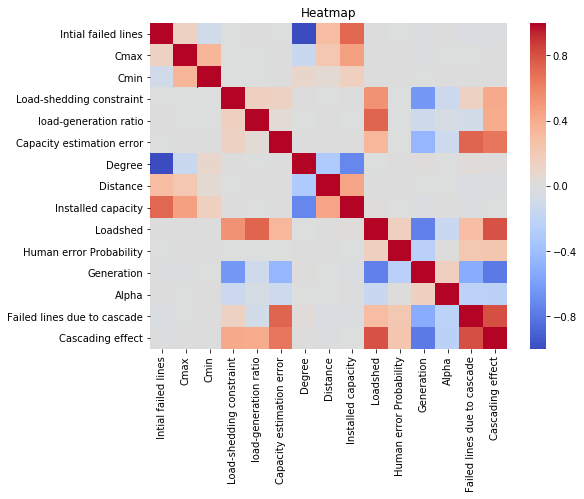

In [157]:
plt.subplots(figsize=(8,6))
sns.heatmap(dataset.corr(),cmap ='coolwarm',)
plt.title('Heatmap')
plt.savefig('heatmap.png', format='png',bbox_inches='tight')

Figure abobe represents the updated heatmap plot after removing unwanted columns

In [160]:
dataset.rename(columns ={'Cascading effect':'Cascading_effect'},inplace = True)

- First let's look at the histograms of the dataset. 

- Checking the histogram of the cascading effect. It can be observed that the histogram looks bimodal. The first pick indicates a zone where no additional transimission liens were failed due to cascade and noloads weere shed i.e., for the set of feature values no cascading occured. Similarly, the second pick represents that average cascading effect occured at 0.35

- The histogram of loadshedding is slightly skewed to the left, which is intuitive. This indicates the probability of a large cascading failure occuring is less. This, also indicates that matpower optimal power flow (OPF)  is curtailing the loads efficiently to minimize the grater risk of a cascading failure. 

- The histogram of failed transmission lines due to cascade also validates the statement above. Looking at the histogram we can see there are around 13500 points with zero additional failures, which is roughly around 20% of the samples. In those 20% samples, only zero/small loadshedding was performed but no additional line failures.  Note that in the data collection process we kept the optimization constaint parameters for laodshedding as constant. for details on matpower power flow algorithms please read the [matpower manual](https://matpower.org/docs/manual.pdf)

- Finally the bottom right histogram shows the frequency distribution of the human error probability used in the simulation. The human error probability was calculated based on operators' performance attributes and the distribution of the operators' performance attributes, see this [paper](https://ieeexplore.ieee.org/abstract/document/8905687/). The distribution of human operator errors were calculated from operator interviews using the SPAR-H methodology in a prior research work. [[3]](https://journals.sagepub.com/doi/abs/10.1177/1541931215591144). 

Text(0.5, 1.0, 'Distribution of human error probability of the samples')

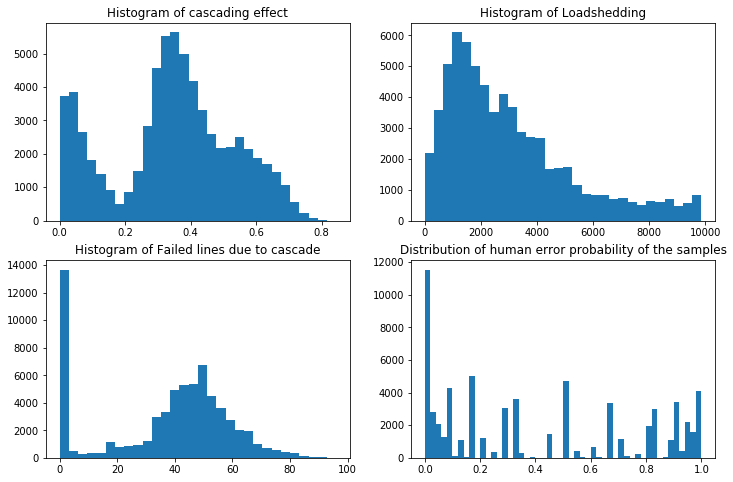

In [161]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(dataset.Cascading_effect, bins =30)
plt.title('Histogram of cascading effect')
plt.subplot(2,2,2)
plt.hist(dataset.Loadshed,bins =30,cumulative=False,histtype='bar')
plt.title('Histogram of Loadshedding')
plt.subplot(2,2,3)
plt.hist(dataset['Failed lines due to cascade'],bins =30)
plt.title('Histogram of Failed lines due to cascade')
plt.subplot(2,2,4)
dataset['Human error Probability'].hist(bins = 50, grid = False)
plt.title('Distribution of human error probability of the samples')

- In the simulation we first calculated the human error probability as descried above, and then based on of the status power grid (represented by the load-generation ratio, load shedding constrain and capasity estimation error) we modified it using a small set of rules and then embedded it in the simulation to capture the effect of human errors on cascading failure


Now let's look at some boxplots to see the joint relations between some variables.

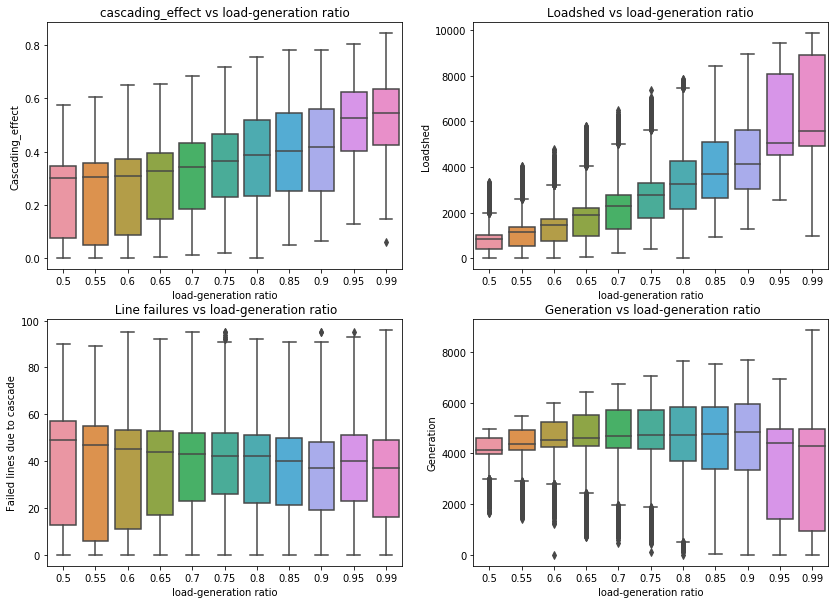

In [162]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.title('cascading_effect vs load-generation ratio')
sns.boxplot(y = 'Cascading_effect', x ='load-generation ratio', data=dataset)

plt.subplot(2,2,2)
plt.title('Loadshed vs load-generation ratio')
sns.boxplot(y = 'Loadshed', x ='load-generation ratio', data=dataset)
plt.subplot(2,2,3)
plt.title(' Line failures vs load-generation ratio')
sns.boxplot(y = 'Failed lines due to cascade', x ='load-generation ratio', data=dataset)
plt.subplot(2,2,4)
plt.title(' Generation vs load-generation ratio')
sns.boxplot(y = 'Generation', x ='load-generation ratio', data=dataset)

plt.savefig('loadshedding vs load-generation ratio ratio.png', format='png',bbox_inches='tight')

- In the plots above we show the changes in various variables with changes in load-generation ratio. As the name suggests, load-generation ratio is the ratio between load demand and maximum generation. This value is a measure of stress of the grid and can range between (0,1). Intuitively, a high load-generation ratio increases the stress on the grid to serve more customers, which increases the probability of a cascading failure. Here we considered load-generation ratios between 0.5 and 0.99.

- The upper left plot shows that the average cascading effect increases with the increase in load-generation ratio.

- One might expect that the failed lines due to cascade and loadshed also would increase with load-generation ratio, however, from subplot 2 and 3 we can see that loadshedding increases with load-generation ratio. but line failures are somewhat decreasing, which is very interesting. Most of the research articles don't consider loadshedding as a parameter and extrapolates that with demand increases it's highly likely that line failures increase. In our simulations you use loadshedding to minimize line failures/cascading failures. Thus, when the grid is stressed, it is doing more loadshedding to minimize the number of transmission line failures.

- As stated above we did not change the loadshedding cost settings in the simulations. This can be observed from the bottom-right plot. With increase in load-generation ratio, power generation did not increase as much (maximum possible generation 9966MW). This indicates that the cost of loadshedding is lower than the cost of generation in the selected setting on average.  


Text(0.5, 1.0, 'amount of load-shed vs Load-shedding constraint')

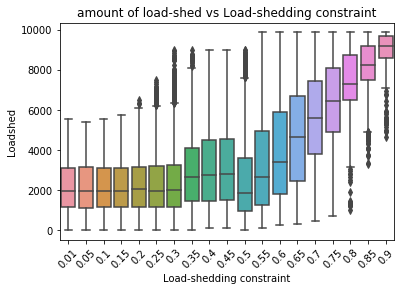

In [169]:
chart= sns.boxplot(dataset['Load-shedding constraint'],dataset.Loadshed)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('amount of load-shed vs Load-shedding constraint')

The boxplot above shows an interesting observation. The average of the amount of loadshed is fairly same for load-shedding constraint values from 0 to 0.5. But, it increases exponentially for load-shedding constraint values >0.5. after careful analysis,I found that when the load-shedding constrain is very high, we are allowing more and load loads to participate in loadshedding and the OPF is shedding the loads based on cost setting.   

Text(0.5, 1.0, 'capacity estimation error vs loadshedding')

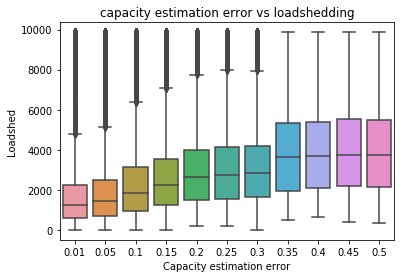

In [177]:
sns.boxplot(dataset['Capacity estimation error'],dataset.Loadshed)
plt.title ('capacity estimation error vs loadshedding')

The boxplot above reprerents an increaseing trend in the amount of loadshedding vs increases in capacity estimation erros.

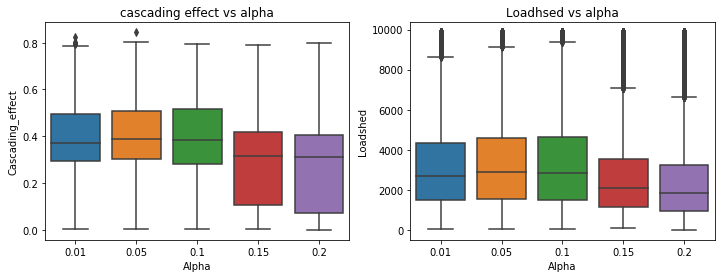

In [185]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('cascading effect vs alpha')

sns.boxplot(dataset.Alpha,dataset.Cascading_effect)
plt.subplot(1,2,2)
plt.title('Loadhsed vs alpha')

sns.boxplot(dataset.Alpha,dataset.Loadshed)

Alpha is a parameter introduced to vary the effect of overloading in the transmission lines. Higher value of alpha adds some buffer capacity in the transmission lines to cope with the overloading.  As expected, amount of loadshed and cascading effect decreases with alpha.

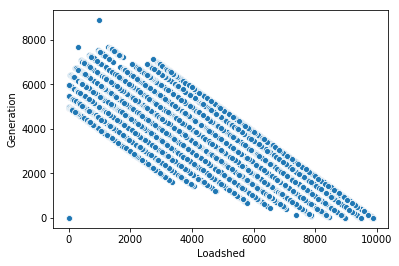

In [186]:
sns.scatterplot(dataset.Loadshed, dataset.Generation)

The scatterplot above shows negative linear correlation between genration and Loadshedding. We need to remove generation from the feature set to avoid colinearity 

Text(0.5, 1.0, 'cascading effect vs degree')

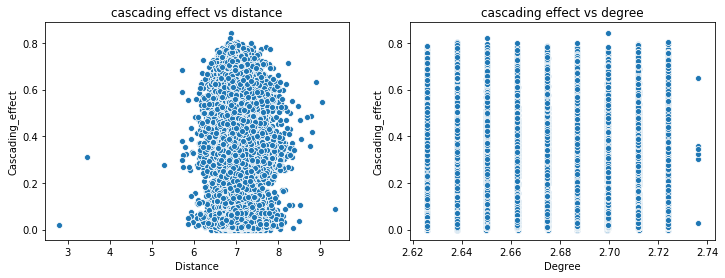

In [192]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(dataset.Distance,dataset.Cascading_effect)
plt.title('cascading effect vs distance')
plt.subplot(1,2,2)
sns.scatterplot(dataset.Degree, dataset.Cascading_effect)
plt.title('cascading effect vs degree')


The plots above represents the effect of topological variables on cascading failures. There is no visible patterns between degree and distance  with cascading failure. We can remove this two features from the data set as well. But i will keep them  for now and may delete them during model tuning.

Text(0.5, 1.0, 'cascading effect vs degree')

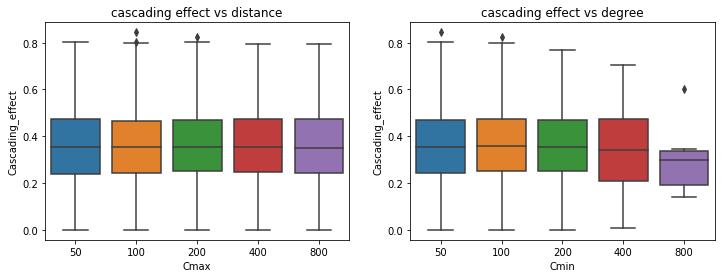

In [194]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(dataset.Cmax,dataset.Cascading_effect)
plt.title('cascading effect vs distance')
plt.subplot(1,2,2)
sns.boxplot(dataset.Cmin, dataset.Cascading_effect)
plt.title('cascading effect vs degree')

There is very low effect of the maximum and the minimum capacity of the failed lines on cascading effect. We still would like to keep them as features as other works considers them as important features. 